<a href="https://colab.research.google.com/github/Utpal-Mishra/Optimal-Control-Therapy-4-Cancer-Treatment/blob/main/OptimalControlTherapy4CancerTreatmentTASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT** 

### GOOGLE DRIVE

In [ ]:
from google.colab import drive # import google drive into colaboratory
drive.mount("/content/drive")  # mount drive and the files

print("\nGOOGLE DRIVE is MOUNTED!!!")

Mounted at /content/drive

GOOGLE DRIVE is MOUNTED!!!


### LIBRARIES

In [ ]:
import pandas as pd              # import pandas to use high-performance data structure and for data analysis
import numpy as np               # import numpy to evaluate data using mathematical operations
import matplotlib.pyplot as plt  # import matplotlib for 2D graphs and plots 
import seaborn as sns            # import seaborn for visualization 
import plotly.express as px      # import plotly for interactive plots
import plotly.graph_objects as go

import sys                       # import sys to manipulate Python runtime environment
sys.setrecursionlimit(100000)    # setting recursion limit for execusion

from sklearn import preprocessing                  # import preprocessing from sklearn statistical computations
from sklearn.preprocessing import StandardScaler   # import standardscaler for scaling the feature variables
scale = StandardScaler()                           # creating scaling object

print("LIBRARIES are IMPORTED!!!")

LIBRARIES are IMPORTED!!!


### DATA 

In [ ]:
path = "/content/drive/MyDrive/UCD Research/Data.xlsx"   # set the path of the .csv file from drive

data = pd.read_excel(path)                                                                 # using read_csv() of pandas library to read the data file 
print("DATA is IMPORTED!!!")

print("\nDimensions of Data: ", data.shape)                                                # printing the dimensions of the dataset

DATA is IMPORTED!!!

Dimensions of Data:  (29, 48)


In [ ]:
#data.head() # or data.head(n), n=5 by default
# taking a look at the first 5 rows of the data using .head() 
data.sort_values("Patient No.")
data

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47
0,0006 00007 RJW,2001-01-22,22,F,67.9,90,1.00,0.140,0.030,0.02,NaN,0.013,0.005037,0.014,0.020,0.004000,0.005,0.006,0.003,0.004,0.003,0.002,0.002,0.003,0.002,0.0010,0.001,0.001,0.001,0.001,0.0020,0.001,0.0010,0.0010,NaN,0.0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-12,NaN
1,0004 00003-CAR,2000-08-29,23,F,67.9,,NaN,NaN,2.600,1.9,0.930,0.340,NaN,0.280,NaN,NaN,NaN,0.200,0.180,0.090,0.110,0.170,0.12,0.030,0.040,0.0400,0.010,0.010,0.010,NaN,0.0100,0.010,NaN,0.0050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-07,NaN
2,0003 00002 CL,2000-08-08,27,F,67.9,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300,0.700,NaN,0.350,0.480,0.170,0.33,0.450,0.360,0.3100,NaN,NaN,NaN,0.180,NaN,0.120,NaN,NaN,NaN,0.1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-09,NaN
3,0011 00003 LM,2000-11-14,38,F,72.8,55,58.00,9.600,12.000,159,1.600,NaN,NaN,NaN,NaN,NaN,445.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-08-19,NaN
4,0001 00004 AJR,2000-08-04,51,F,75.9,28,0.08,0.026,0.042,0.022,0.018,NaN,0.003000,NaN,0.009,0.007000,0.007,0.005,0.005,0.004,0.004,0.006,0.004,0.004,NaN,0.0030,NaN,0.003,0.002,0.004,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-11,NaN
5,0011 00001 CMC,2000-10-24,52,F,75.9,213,7.60,0.510,0.090,0.07,NaN,0.030,NaN,NaN,NaN,NaN,NaN,0.010,0.010,0.005,0.007,0.003,0.003,0.009,0.004,0.0020,NaN,0.003,0.002,NaN,NaN,NaN,0.0030,NaN,0.010,0.0030,NaN,0.0020,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-12,NaN
6,0010 00001 HJ,2000-09-08,57,F,75.9,39,6.30,0.250,0.130,0.17,0.150,NaN,0.060000,0.130,NaN,0.030000,0.030,0.010,0.060,0.010,0.010,0.014,0.02,0.004,0.003,0.0009,NaN,0.004,0.001,0.004,0.0002,0.004,0.0009,0.0007,NaN,0.0010,0.001,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-10-01,NaN
7,0007 00002 DPS,2000-08-04,22,M,80.7,172,NaN,NaN,0.100,0.14,0.020,NaN,0.020000,NaN,0.020,NaN,NaN,NaN,0.020,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0020,NaN,0.008,NaN,NaN,NaN,0.290,NaN,0.005,NaN,NaN,NaN,0.0020,NaN,2010-06-08,"(patient had ceased imatinib for 6 weeks, whic..."
8,0002 00003 SMV,2000-09-04,24,M,80.7,,0.12,0.027,0.025,0.033,0.029,NaN,0.012000,0.017,0.013,0.013000,0.018,0.014,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.0040,0.003,0.003,0.002,0.002,0.0050,0.002,0.0030,0.0080,0.001,NaN,0.001,NaN,0.001,0.002,0.001,0.0020,NaN,0.002,NaN,NaN,2010-04-15,NaN
9,0011 00005 SCW,2000-11-29,26,M,80.7,36,1.40,0.500,0.280,0.16,NaN,0.190,NaN,NaN,NaN,NaN,0.130,0.020,0.170,0.150,0.060,0.070,NaN,0.120,0.050,0.0900,NaN,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0060,0.020,0.0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-03,NaN


## **EXPLORATORY DATA ANALYSIS**

### DEALING WITH EMPTY/ NULL VALUES

ANALYZING TOTOAL EMPTY VALUES IN EACH FEATURE VARIABLE

In [ ]:
if data.isna().sum().sum() != 0:
  print("EMPTY VALUES EXIST IN THE DATA\n\nFollowing is a list of feature variable with their respective null values count:\n", data.isna().sum())  #or data.applymap(np.isreal).all()
# listing the total number of null values in each column of the dataset

EMPTY VALUES EXIST IN THE DATA

Following is a list of feature variable with their respective null values count:
 Patient No.                      0
start date                       0
Age                              0
sex                              0
Weight (kg)                      0
Baseline                         1
3                                2
6                                5
9                                4
12                               6
15                              17
18                              12
21                              12
24                              11
27                              11
30                              11
33                               6
36                               7
39                               5
42                               7
45                               7
48                              10
51                              12
54                              10
57                              11
60         

FILLING NULL VALUES OF THE NUMERICAL FEATURES WITH THEIR MEANS

REMOVING NULL FEATURE VARIABLES


REPLACE 'Unknown' WITH EMPTY VALUES IN CATEGORICAL VARIABLES

In [ ]:
data = data.fillna(data.mean())                                                        # filling null celss of feature variables with the mean value of non-empty cells
#data = data.fillna("Unknown")                                                          # filling left over empty categorical features with 'Unknown' label

data[51] = data[51].fillna(0)
data[51] = data[51].replace(" ", 0)
data[51] = data[51].astype(str).astype(float)

data[105] = data[105].fillna(0)
data[105] = data[105].replace(" ", 0)
data[105] = data[105].astype(str).astype(float)

data[12] = data[12].fillna(0)
data[12] = data[12].replace(" ", 0)
data[12] = data[12].astype(str).astype(float)

data.Baseline = data.Baseline.fillna(0)
data.Baseline = data.Baseline.replace(" ", 0)
data.Baseline = data.Baseline.astype(str).astype(int)

data["Unnamed: 47"] = data["Unnamed: 47"].fillna('Unknown')

print("EMPTY VALUES: ", data.isna().sum().sum())  #or data.applymap(np.isreal).all()   # listing the total number of null values in each column of the dataset

EMPTY VALUES:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [ ]:
from google.colab import files

data.to_csv("data.csv")
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODELING**

## **Splitting**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data.head()

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47
0,0006 00007 RJW,2001-01-22,22,F,67.9,90,1.000000,0.14000,0.0300,0.020,0.246333,0.013000,0.005037,0.014000,0.0200,0.004000,0.005000,0.006000,0.003000,0.004000,0.003000,0.002000,0.002,0.003000,0.0020,0.001000,0.001000,0.00100,0.001000,0.001000,0.002000,0.001000,0.0010,0.001000,0.019231,0.000400,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2008-06-12,Unknown
1,0004 00003-CAR,2000-08-29,23,F,67.9,0,11.928148,5.79725,2.6000,1.900,0.930000,0.340000,0.084179,0.280000,7.7335,0.205984,21.274826,0.200000,0.180000,0.090000,0.110000,0.170000,0.120,0.030000,0.0400,0.040000,0.010000,0.01000,0.010000,2.504176,0.010000,0.010000,0.0023,0.005000,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2007-09-07,Unknown
2,0003 00002 CL,2000-08-08,27,F,67.9,0,29.000000,5.79725,8.4222,0.000,0.246333,3.030176,0.084179,0.948278,7.7335,0.205984,1.300000,0.700000,2.765458,0.350000,0.480000,0.170000,0.330,0.450000,0.3600,0.310000,0.062615,0.04135,0.005077,0.180000,0.021767,0.120000,0.0023,0.022713,0.019231,0.120000,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2008-01-09,Unknown
3,0011 00003 LM,2000-11-14,38,F,72.8,55,58.000000,9.60000,12.0000,159.000,1.600000,3.030176,0.084179,0.948278,7.7335,0.205984,445.000000,1.667455,2.765458,3.391273,2.227182,4.602579,0.000,0.054789,0.0435,0.045895,0.062615,0.04135,0.005077,2.504176,0.021767,0.018368,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2003-08-19,Unknown
4,0001 00004 AJR,2000-08-04,51,F,75.9,28,0.080000,0.02600,0.0420,0.022,0.018000,3.030176,0.003000,0.948278,0.0090,0.007000,0.007000,0.005000,0.005000,0.004000,0.004000,0.006000,0.004,0.004000,0.0435,0.003000,0.062615,0.00300,0.002000,0.004000,0.021767,0.003000,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2007-01-11,Unknown


In [ ]:
df = pd.DataFrame(data.groupby("Patient No.")[[3, 6, 9, 12, 15, 18, 21, 24, 27, 
                                               30, 33, 36, 39, 42, 45, 48, 51, 54, 
                                               57, 60, 63, 66, 69, 72, 75, 78, 81, 
                                               84, 87, 90, 93, 96, 99, 102,  105, 
                                               108,  111, 114, 117, 120,]].first()).reset_index()  # grouping the features based on class feature

df = df[df["Patient No."]=="0001 00002 RH"]

#print("Data Dimensions: ", df.shape)
#df.head()      

from sklearn.model_selection import train_test_split

X = df[df.columns[1:30]]
y = df[df.columns[30:41]]

x_train = X
y_train = y                                                                                                             # display last 5 data rows

## **TASK 1**

### **Model 1**

In [ ]:
"""lr = LinearRegression()
  
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
y_pred = lr.predict(x_train)"""

#plt.yscale('log')
#plt.scatter(x_train, y_train, color ='b')
#plt.plot(y_train, lr.predict(x_train), color ='k')
#plt.plot(y_test, lr.predict(x_test), color ='red')

'lr = LinearRegression()\n  \nlr.fit(x_train, y_train)\nprint(lr.score(x_train, y_train))\ny_pred = lr.predict(x_train)'

In [ ]:
"""#plot for the TRAIN
plt.yscale('log')
plt.scatter(x_train, y_train, color='red') # plotting the observation line
plt.plot(x_train, lr.predict(x_train), color='blue') # plotting the regression line
#plt.plot(x_train[10:30], lr.predict(x_train)[10:30], color='green') # plotting the regression line
plt.xlabel("t[days]") # adding the name of x-axis
plt.ylabel("BCR-ABL% Values") # adding the name of y-axis
plt.show() # specifies end of graph"""

'#plot for the TRAIN\nplt.yscale(\'log\')\nplt.scatter(x_train, y_train, color=\'red\') # plotting the observation line\nplt.plot(x_train, lr.predict(x_train), color=\'blue\') # plotting the regression line\n#plt.plot(x_train[10:30], lr.predict(x_train)[10:30], color=\'green\') # plotting the regression line\nplt.xlabel("t[days]") # adding the name of x-axis\nplt.ylabel("BCR-ABL% Values") # adding the name of y-axis\nplt.show() # specifies end of graph'

### **Model 2: A**

In [ ]:
df = pd.DataFrame(data.groupby("Patient No.")[[3, 6, 9, 12, 15, 18, 21, 24, 27, 
                                               30, 33, 36, 39, 42, 45, 48, 51, 54, 
                                               57, 60, 63, 66, 69, 72, 75, 78, 81, 
                                               84, 87, 90, 93, 96, 99, 102,  105, 
                                               108,  111, 114, 117, 120,]].first()).reset_index()  # grouping the features based on class feature

stats = df.melt(id_vars=["Patient No."], var_name = "Imatinib Months", value_name="BCR-ABL% Values" )                          # create a dataframe with class, measuring parameters and values
#stats.sort_values(["Patient No.", "Imatinib Months"], inplace = True) 



df = stats[stats["Patient No."] == "0001 00002 RH"][["Imatinib Months", "BCR-ABL% Values"]]
df["Imatinib Months"] = df["Imatinib Months"].apply(lambda x: round(x*(365/12)))
df.head()            
#df["Imatinib Months"]   

,Imatinib Months,BCR-ABL% Values
0,91,4.500000
29,182,0.360000
58,274,0.210000
87,365,0.170000
116,456,0.246333


In [ ]:
df.to_csv("stats.csv")
files.download("stats.csv")                                                                                               # display last 5 data rows

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
Y = np.log10(Y)

#X = X.reshape(-1, 1)
#Y = Y.reshape(-1, 1)

print(X.shape)
print(Y.shape)

(40, 1)
(40,)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LinearRegression()

for i in range(5,10,1):
  kfold = KFold(n_splits=i)
  mse = cross_val_score(model, X, Y, cv = kfold,scoring = "neg_mean_squared_error")
  #mselog = cross_val_score(model, X, Y, cv = kfold,scoring = "neg_mean_squared_log_error")
  var = cross_val_score(model, X, Y, cv = kfold,scoring = "explained_variance")
  r2 = cross_val_score(model, X, Y, cv = kfold,scoring = "r2")
  print("k: ",i, ":: MSE: %0.5f" % np.sqrt(-mse.mean()), ":: Variance: %.5f" % np.mean(var), ":: R2: %.5f:" % np.mean(r2)) #":: log(MSE): %.5f", np.mean(mselog)

k:  5 :: MSE: 1.13190 :: Variance: 0.18729 :: R2: -6.02311:
k:  6 :: MSE: 1.09831 :: Variance: 0.17552 :: R2: -5.88141:
k:  7 :: MSE: 1.07454 :: Variance: 0.00341 :: R2: -9.18268:
k:  8 :: MSE: 1.03113 :: Variance: 0.22938 :: R2: -8.02691:
k:  9 :: MSE: 0.94951 :: Variance: 0.20329 :: R2: -5.85702:


In [ ]:
from sklearn.linear_model import LinearRegression
import random

lr1 = LinearRegression()
lr2 = LinearRegression()
lr1.fit(X[:8, ], Y[:8, ])
lr2.fit(X[7:35, ], Y[7:35, ])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

train_err = list()
test_err  = list()

for k in range(5, 10, 1):
    print("k: ", k)
    for i in range(len(X[:k, ])):
      # calculate error
      train_err = (Y[:k, ][i] - lr1.predict(X[:k, ][[i]]))**2
      #print("Error For Observation " + str(i+1) + ": %.5f" % Err[0])
    print("Training Error: %.5f" % train_err.sum())

    for i in range(len(X[k-2:35, ])):
      # calculate error
      Err = (Y[k-2:35, ][i] - lr1.predict(X[k-2:35, ][[i]]))**2
    print("Testing Error: %.5f" % Err.sum(), "\n")


k:  5
Training Error: 0.31322
Testing Error: 87.22667 

k:  6
Training Error: 0.02417
Testing Error: 87.22667 

k:  7
Training Error: 0.03316
Testing Error: 87.22667 

k:  8
Training Error: 0.00413
Testing Error: 87.22667 

k:  9
Training Error: 0.31413
Testing Error: 87.22667 



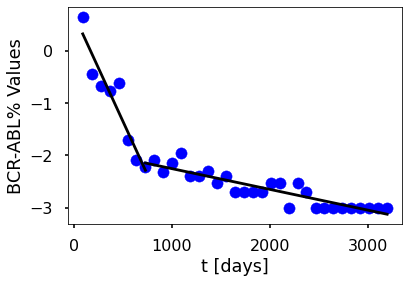

In [ ]:
#plt.yscale("log")
plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(X[:8, ]), color='black')
plt.plot(X[7:35, ], lr2.predict(X[7:35, ]), color='black') 
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t [days]")
plt.show()

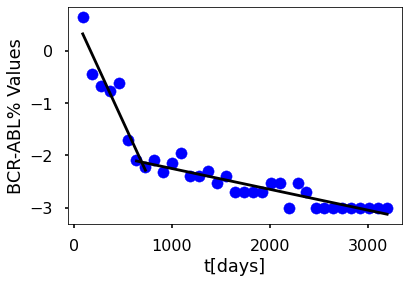

In [ ]:
lr1.fit(X[:8, ], Y[:8, ])
lr2.fit(X[6:35, ], Y[6:35, ])

plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(X[:8, ]), color='black')
plt.plot(X[6:35, ], lr2.predict(X[6:35, ]), color='black')
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t[days]")
plt.show()

### **Polynomial**

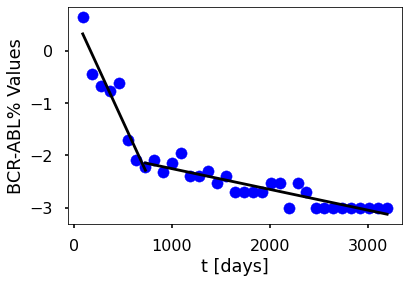

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 1)
X_poly = pr.fit_transform(X)

lr1 = LinearRegression()
lr2 = LinearRegression()
lr1.fit(X_poly[:8, ], Y[:8, ])
lr2.fit(X_poly[7:35, ], Y[7:35, ])

#plt.yscale("log")
plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(pr.fit_transform(X[:8, ])), color='black')
plt.plot(X[7:35, ], lr2.predict(pr.fit_transform(X[7:35, ])), color='black')
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t [days]")
plt.show()

## **TASK 2**

### data

In [ ]:
df = pd.DataFrame(data)
df.shape

(29, 48)

In [ ]:
df.sex = data.sex.apply(lambda x: 0 if x == "F" else 1)
df["Weight/mean(Weight)-1"] = (df["Weight (kg)"]/round(df["Weight (kg)"].mean(), 1)) - 1
df["Age/mean(Age)-1"] = (df["Age "]/round(df["Age "].mean(), 1)) - 1
df["1 - sex"] = 1 - df["sex"]
df.head(3)

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47,Weight/mean(Weight)-1,Age/mean(Age)-1,1 - sex
0,0006 00007 RJW,2001-01-22,22,0,67.9,90,1.000000,0.14000,0.0300,0.02,0.246333,0.013000,0.005037,0.014000,0.0200,0.004000,0.005000,0.006,0.003000,0.004,0.003,0.002,0.002,0.003,0.002,0.001,0.001000,0.00100,0.001000,0.001000,0.002000,0.001,0.0010,0.001000,0.019231,0.000400,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2008-06-12,Unknown,-0.189737,-0.529915,1
1,0004 00003-CAR,2000-08-29,23,0,67.9,0,11.928148,5.79725,2.6000,1.90,0.930000,0.340000,0.084179,0.280000,7.7335,0.205984,21.274826,0.200,0.180000,0.090,0.110,0.170,0.120,0.030,0.040,0.040,0.010000,0.01000,0.010000,2.504176,0.010000,0.010,0.0023,0.005000,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2007-09-07,Unknown,-0.189737,-0.508547,1
2,0003 00002 CL,2000-08-08,27,0,67.9,0,29.000000,5.79725,8.4222,0.00,0.246333,3.030176,0.084179,0.948278,7.7335,0.205984,1.300000,0.700,2.765458,0.350,0.480,0.170,0.330,0.450,0.360,0.310,0.062615,0.04135,0.005077,0.180000,0.021767,0.120,0.0023,0.022713,0.019231,0.120000,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2008-01-09,Unknown,-0.189737,-0.423077,1


In [ ]:
Qa = 12.8
Qb = 258 
Q1 = 12.7
Q2 = 0.8
Q3 = -2.1
Q4 = 61.0
ka = 0.61

CL = Qa + Q1*df["Weight/mean(Weight)-1"] + Q2*df['sex'] - Q2*df["1 - sex"] + Q3*df["Age/mean(Age)-1"]
v  = Qb + Q4*df['sex'] - Q4*df["1 - sex"]
df["CL"] = CL
df["v"] = v

df = pd.DataFrame(data[['Patient No.', 'start date', 'Age ', 'Age/mean(Age)-1', 'sex', '1 - sex', 'Weight (kg)', 'Weight/mean(Weight)-1', 
       'Baseline', 'CL', 'v', 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42,
       45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93,
       96, 99, 102, 105, 108, 111, 114, 117, 120,
       'Date of last sample analysed']])
df.head(10)

,Patient No.,start date,Age,Age/mean(Age)-1,sex,1 - sex,Weight (kg),Weight/mean(Weight)-1,Baseline,CL,v,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed
0,0006 00007 RJW,2001-01-22,22,-0.529915,0,1,67.9,-0.189737,90,10.703155,197.0,1.000000,0.14000,0.0300,0.020,0.246333,0.013000,0.005037,0.014000,0.0200,0.004000,0.005000,0.006000,0.003000,0.004000,0.003000,0.002000,0.002,0.003000,0.0020,0.001000,0.001000,0.00100,0.001000,0.001000,0.002000,0.001000,0.0010,0.001000,0.019231,0.000400,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-06-12
1,0004 00003-CAR,2000-08-29,23,-0.508547,0,1,67.9,-0.189737,0,10.658283,197.0,11.928148,5.79725,2.6000,1.900,0.930000,0.340000,0.084179,0.280000,7.7335,0.205984,21.274826,0.200000,0.180000,0.090000,0.110000,0.170000,0.120,0.030000,0.0400,0.040000,0.010000,0.01000,0.010000,2.504176,0.010000,0.010000,0.0023,0.005000,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2007-09-07
2,0003 00002 CL,2000-08-08,27,-0.423077,0,1,67.9,-0.189737,0,10.478796,197.0,29.000000,5.79725,8.4222,0.000,0.246333,3.030176,0.084179,0.948278,7.7335,0.205984,1.300000,0.700000,2.765458,0.350000,0.480000,0.170000,0.330,0.450000,0.3600,0.310000,0.062615,0.04135,0.005077,0.180000,0.021767,0.120000,0.0023,0.022713,0.019231,0.120000,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-01-09
3,0011 00003 LM,2000-11-14,38,-0.188034,0,1,72.8,-0.131265,55,10.727807,197.0,58.000000,9.60000,12.0000,159.000,1.600000,3.030176,0.084179,0.948278,7.7335,0.205984,445.000000,1.667455,2.765458,3.391273,2.227182,4.602579,0.000,0.054789,0.0435,0.045895,0.062615,0.04135,0.005077,2.504176,0.021767,0.018368,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2003-08-19
4,0001 00004 AJR,2000-08-04,51,0.089744,0,1,75.9,-0.094272,28,10.614283,197.0,0.080000,0.02600,0.0420,0.022,0.018000,3.030176,0.003000,0.948278,0.0090,0.007000,0.007000,0.005000,0.005000,0.004000,0.004000,0.006000,0.004,0.004000,0.0435,0.003000,0.062615,0.00300,0.002000,0.004000,0.021767,0.003000,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2007-01-11
5,0011 00001 CMC,2000-10-24,52,0.111111,0,1,75.9,-0.094272,213,10.569411,197.0,7.600000,0.51000,0.0900,0.070,0.246333,0.030000,0.084179,0.948278,7.7335,0.205984,21.274826,0.010000,0.010000,0.005000,0.007000,0.003000,0.003,0.009000,0.0040,0.002000,0.062615,0.00300,0.002000,2.504176,0.021767,0.018368,0.0030,0.022713,0.010000,0.003000,0.013083,0.00200,0.001000,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-12-12
6,0010 00001 HJ,2000-09-08,57,0.217949,0,1,75.9,-0.094272,39,10.345052,197.0,6.300000,0.25000,0.1300,0.170,0.150000,3.030176,0.060000,0.130000,7.7335,0.030000,0.030000,0.010000,0.060000,0.010000,0.010000,0.014000,0.020,0.004000,0.0030,0.000900,0.062615,0.00400,0.001000,0.004000,0.000200,0.004000,0.0009,0.000700,0.019231,0.001000,0.001000,0.00100,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-10-01
7,0007 00002 DPS,2000-08-04,22,-0.529915,1,0,80.7,-0.036993,172,14.243011,319.0,11.928148,5.79725,0.1000,0.140,0.020000,3.030176,0.020000,0.948278,0.0200,0.205984,21.274826,1.667455,0.020000,3.391273,0.006000,4.602579,0.000,0.054789,0.0435,0.045895,0.062615,0.04135,0.005077,2.504176,0.021767,0.018368,0.0020,0.022713,0.008000,0.021338,0.013083,0.00529,0.290000,0.173,0.005,0.06308,0.001407,0.14625,0.002000,0.004,2010-06-08
8,0002 00003 SMV,2000-09-04,24,-0.487179,1,0,80.7,-0.036993,0,14.153268,319.0,0.120000,0.02700,0.0250,0.033,0.029000,3.030176,0.012000,0.017000,0.0130,0.013000,0.018000,0.014000,2.765458,3.391273,2.227182,4.602579,0.000,0.054789,0.0020,0.004000,0.003000,0.00300,0.002000,0.002000,0.005000,0.002000,0.0030,0.008000,0.001000,0.021338,0.001000,0.00529,0.001000,0.0

### solve_ivp

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

from scipy.integrate import solve_ivp # import scipy.integrate.solve_ivp to solve the equation

In [ ]:
# solving non-differential equations 
def ode_chi_solve():
    CL=14.3 # Clearance rate, has units of Volume / Time, or Litres / Hours
    ka=0.61 # Contstant ka with units of 1/hours
    v=347   # Volume of blood in the pateints body, units of Litres
    D=400   # D is dose, units of mass, standard units of mass here are milligrams, take D=400 mg
    f=1     # Bioavailability 
    t_eval = np.arange(0, 24, 0.3) # Times at which to store the computed solution, and must be sorted

    F = lambda t, s: -ka*s # lambda function is used to have a function with unsed input
    chig = solve_ivp(F, [0, 24], [D*f], t_eval=t_eval) # takes the integral of F over [0, 24] with intial state [D*f] and t_eval time
    # solve_ivp(fun,t_span,s0,method=′RK45′,t_eval=None)
    # F take in the function in the right-hand side of the system
    # t_span is the limit of integral from 0 to 24
    # s0 defines the intial state to D*f
    # t_eval takes in the times at which to store the computed solution, and must be sorted and lie within t_span
    #chig # solution of the equation

    F = lambda t, s: ka*t -(CL/v)*s # lambda function is used to have a function with unsed input
    chib = solve_ivp(F, [0, 24], [D*f, 0], t_eval=t_eval) # takes the integral of F over [0, 24] with intial state [0, D*f] and t_eval time
    # solve_ivp(fun,t_span,s0,method=′RK45′,t_eval=None)
    # F take in the function in the right-hand side of the system
    # t_span is the limit of integral from 0 to 24
    # s0 defines the intial state [0, D*f]
    # t_eval takes in the times at which to store the computed solution, and must be sorted and lie within t_span
    #chib # solution of the equation

    return chig.t, chig.y[0], chib.y[1] # return the solution to the linear equation chig.t == chib.t (t_eval)

ode_chi_solve() # call the function to execute

(array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
         9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3, 12.6, 12.9,
        13.2, 13.5, 13.8, 14.1, 14.4, 14.7, 15. , 15.3, 15.6, 15.9, 16.2,
        16.5, 16.8, 17.1, 17.4, 17.7, 18. , 18.3, 18.6, 18.9, 19.2, 19.5,
        19.8, 20.1, 20.4, 20.7, 21. , 21.3, 21.6, 21.9, 22.2, 22.5, 22.8,
        23.1, 23.4, 23.7]),
 array([4.00000000e+02, 3.33094307e+02, 2.77370333e+02, 2.31001227e+02,
        1.92392470e+02, 1.60180648e+02, 1.33349986e+02, 1.11059436e+02,
        9.25405447e+01, 7.70975996e+01, 6.41874838e+01, 5.34391676e+01,
        4.45098731e+01, 3.70877072e+01, 3.08929494e+01, 2.57185890e+01,
        2.14132801e+01, 1.78371279e+01, 1.48630495e+01, 1.23785802e+01,
        1.03050218e+01, 8.58061500e+00, 7.14829168e+00, 5.95630701e+00,
        4.95993352e+00

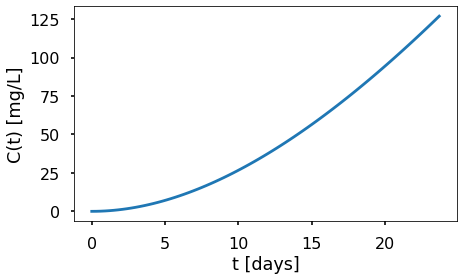

In [ ]:
def chig(CL, v):
  CL=14.3 
  ka=0.61 
  v=347   
  D=400   
  f=1     
  t_eval = np.arange(0, 24, 0.3)  

  F = lambda t, s: ka*t -(CL/v)*s
  chig = solve_ivp(F, [0, 24], [D*f, 0], t_eval=t_eval)
  chig.y[1]

  plt.figure(figsize = (12, 4))
  plt.subplot(121)
  plt.plot(chig.t, chig.y[1])
  plt.xlabel('t [days]')
  plt.ylabel('C(t) [mg/L]')
  plt.tight_layout()
  plt.show()


CL=14.3 
v=347 

chig(CL, v)

### odeint

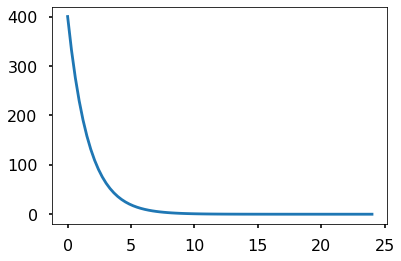

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def model(t, s):
  CL=14.3
  v=347  
  ka = 0.61
  dchigdt = -ka*t 
  #dchibdt = ka*t + (CL/v)*s
  return dchigdt#, dchibdt

CL=14.3 
ka=0.61 
v=347   
D=400   
f=1     
y0 = (D*f)
t_eval = np.linspace(0, 24, 80) #np.arange(0, 24, 0.3)
#chig, chib = odeint(model, y0, t_eval)
result = odeint(model, y0, t_eval)

#for i in result:
#  print(i[0], "\t")

plt.plot(t_eval,result)

In [ ]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def pkmodel(x, t):
  CL=14.3 
  ka=0.61 
  v=347   
  chig = x[0]
  chib = x[1]

  #dchigdt = -ka*chig
  #dchibdt = ka*chig - CL*(chib/v)
  dydt = [-ka*chig, ka*chig - CL*(chib/v)]
  return dydt

D = 400
f = 1
xi = [D*f, 0]
t_eval = np.linspace(0, 24, 80) #np.arange(0, 24, 0.3)
Y = (odeint(pkmodel, xi, t_eval))

# plt.plot(t_eval, Y[:, 0]) #chig: amount of Imatinib in the gastrointestinal tract
# plt.plot(t_eval, Y[:, 1]) #chib: the amount of Imatinib in the blood
# plt.ylabel("C(t) [mg/L]")
# plt.xlabel("t [days]")
# plt.show()

fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chig", "", "Time vs chib"))
fig.add_trace(go.Scatter(x=t_eval, y=Y[:, 0], name = "chig: change in amount of Imatinib in the gastrointestinal tract with time"), row=1, col=1)
fig.add_trace(go.Scatter(x=t_eval, y=Y[:, 1], name = "chib: change in the amount of Imatinib in the blood with time"), row=1, col=3)
fig.update_layout(height=450, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_yaxes(title_text = "chig", showline=True, linewidth=2, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True, row = 1, col = 3)
fig.update_yaxes(title_text = "chib", showline=True, linewidth=2, linecolor='black', mirror=True, row = 1, col = 3)
fig.show()

In [ ]:
from scipy import integrate

X, infodict = integrate.odeint(pkmodel,xi,t_eval,full_output=True);
print(infodict['message'])
#print(X)

# plt.plot(t_eval, X.T[0]) #chig: amount of Imatinib in the gastrointestinal tract
# plt.plot(t_eval, X.T[1]) #chib: the amount of Imatinib in the blood
# plt.ylabel("C(t) [mg/L]")
# plt.xlabel("t [days]")
# plt.show()

fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chig", "", "Time vs chib"))
fig.add_trace(go.Scatter(x=t_eval, y=X.T[0], name = "chig: change in amount of Imatinib in the gastrointestinal tract with time"), row=1, col=1)
fig.add_trace(go.Scatter(x=t_eval, y=X.T[1], name = "chib: change in the amount of Imatinib in the blood with time"), row=1, col=3)
fig.update_layout(height=450, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_yaxes(title_text = "chig", showline=True, linewidth=2, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True, row = 1, col = 3)
fig.update_yaxes(title_text = "chib", showline=True, linewidth=2, linecolor='black', mirror=True, row = 1, col = 3)
fig.show()

Integration successful.


In [ ]:
def pkmodel(x, t, CL, v):
    CL, v = CL, v
    #CL=14.3 
    ka=0.61 
    #v=347   
    chig = x[0]
    chib = x[1]
  
    #dchigdt = -ka*chig
    #dchibdt = ka*chig - CL*(chib/v)
    dydt = [-ka*chig, ka*chig - CL*(chib/v)]
    return dydt

D = 400
f = 1
xi = [D*f, 0]
t_eval = np.arange(0, 24, 0.3) #np.arange(0, 24, 0.3)

print("Dimensions of Data: ", df.shape, "\n")

for i in range(df.shape[0]):
    print("\nPatient: ", df["Patient No."][i], " :: Clearance: ", df["CL"][i], " :: Volumne: ", df["v"][i], "\n")
    #params = (df["CL"][i], df["v"][i])
    CL = df["CL"][i]
    v  = df["v"][i]
    Y = odeint(pkmodel, xi, t_eval, args = (CL, v))

    # plt.figure()
    # plt.plot(t_eval, Y[:, 0]) #chig: amount of Imatinib in the gastrointestinal tract
    # plt.plot(t_eval, Y[:, 1]) #chib: the amount of Imatinib in the blood
    # plt.ylabel("C(t) [mg/L]")
    # plt.xlabel("t[days]")
    # plt.show()

    fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chig", "Time vs chib"))
    fig.add_trace(go.Scatter(x=t_eval, y=Y[:, 0], name = "chig: change in amount of Imatinib in the gastrointestinal tract with time"), row=1, col=1)
    fig.add_trace(go.Scatter(x=t_eval, y=Y[:, 1], name = "chib: change in the amount of Imatinib in the blood with time"), row=1, col=3)
    fig.update_layout(height=450, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_yaxes(title_text = "chig", showline=True, linewidth=2, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True, row = 1, col = 3)
    fig.update_yaxes(title_text = "chib", showline=True, linewidth=2, linecolor='black', mirror=True, row = 1, col = 3)
    fig.show()

Dimensions of Data:  (29, 52) 


Patient:  0006 00007 RJW  :: Clearance:  10.703154641698795  :: Volumne:  197.0 




Patient:  0004 00003-CAR  :: Clearance:  10.658282846827001  :: Volumne:  197.0 




Patient:  0003 00002 CL  :: Clearance:  10.47879566733982  :: Volumne:  197.0 




Patient:  0011 00003  LM  :: Clearance:  10.727807355730985  :: Volumne:  197.0 




Patient:  0001 00004 AJR  :: Clearance:  10.614283091610062  :: Volumne:  197.0 




Patient:  0011 00001 CMC  :: Clearance:  10.569411296738267  :: Volumne:  197.0 




Patient:  0010 00001 HJ  :: Clearance:  10.345052322379292  :: Volumne:  197.0 




Patient:  0007 00002 DPS  :: Clearance:  14.243011443608104  :: Volumne:  319.0 




Patient:  0002 00003 SMV  :: Clearance:  14.153267853864515  :: Volumne:  319.0 




Patient:  0011 00005 SCW  :: Clearance:  14.063524264120925  :: Volumne:  319.0 




Patient:  0001 00006 GMC  :: Clearance:  14.553830854904843  :: Volumne:  319.0 




Patient:  0002 00008 SAT  :: Clearance:  14.374343675417663  :: Volumne:  319.0 




Patient:  0004 00004 GDH  :: Clearance:  14.663478367296984  :: Volumne:  319.0 




Patient:  0011 00007 AJS  :: Clearance:  14.483991187809805  :: Volumne:  319.0 




Patient:  0001 00003 AB  :: Clearance:  14.34937580319442  :: Volumne:  319.0 




Patient:  0004 00006 GM  :: Clearance:  14.304504008322624  :: Volumne:  319.0 




Patient:  0007 00001 AJV  :: Clearance:  14.214166819656082  :: Volumne:  319.0 




Patient:  0003 00004 GSW  :: Clearance:  14.169295024784287  :: Volumne:  319.0 




Patient:  0001 00009 MJG  :: Clearance:  14.079551435040697  :: Volumne:  319.0 




Patient:  0008 00005 BAT  :: Clearance:  14.079551435040697  :: Volumne:  319.0 




Patient:  0008 00002 PWR  :: Clearance:  13.989807845297108  :: Volumne:  319.0 




Patient:  0006 00006 ML  :: Clearance:  13.855192460681723  :: Volumne:  319.0 




Patient:  0008 00003 LJG  :: Clearance:  13.810320665809927  :: Volumne:  319.0 




Patient:  0009 00003 LH  :: Clearance:  13.690266813536505  :: Volumne:  319.0 




Patient:  0003 00003 WM  :: Clearance:  13.64539501866471  :: Volumne:  319.0 




Patient:  0010 00002 GR  :: Clearance:  13.600523223792916  :: Volumne:  319.0 




Patient:  0002 00007 PMG  :: Clearance:  13.55565142892112  :: Volumne:  319.0 




Patient:  0001 00002 RH  :: Clearance:  13.510779634049326  :: Volumne:  319.0 




Patient:  0009 00001 DC  :: Clearance:  13.510779634049326  :: Volumne:  319.0 

